CDF (Cumulative Distribution Function):
[  489.   710.   959.  1220.  1485.  1824.  2150.  2579.  3036.  3563.
  4136.  4818.  5509.  6219.  6947.  7764.  8607.  9488. 10322. 11143.
 11983. 12670. 13377. 14051. 14766. 15396. 15985. 16560. 17100. 17658.
 18182. 18704. 19201. 19738. 20231. 20730. 21261. 21814. 22341. 22863.
 23362. 23865. 24301. 24745. 25175. 25581. 25976. 26372. 26761. 27143.
 27521. 27873. 28238. 28571. 28901. 29207. 29539. 29856. 30199. 30494.
 30807. 31123. 31434. 31754. 32027. 32357. 32621. 32902. 33184. 33424.
 33712. 33971. 34280. 34548. 34807. 35081. 35344. 35598. 35840. 36096.
 36359. 36612. 36892. 37155. 37416. 37676. 37932. 38200. 38457. 38682.
 38943. 39187. 39423. 39628. 39864. 40091. 40328. 40565. 40780. 41018.
 41233. 41463. 41686. 41908. 42133. 42360. 42582. 42831. 43030. 43252.
 43479. 43716. 43909. 44143. 44368. 44587. 44822. 45054. 45296. 45497.
 45752. 45971. 46192. 46411. 46612. 46859. 47075. 47293. 47512. 47689.
 47914. 48166. 48432. 48660. 48876. 4

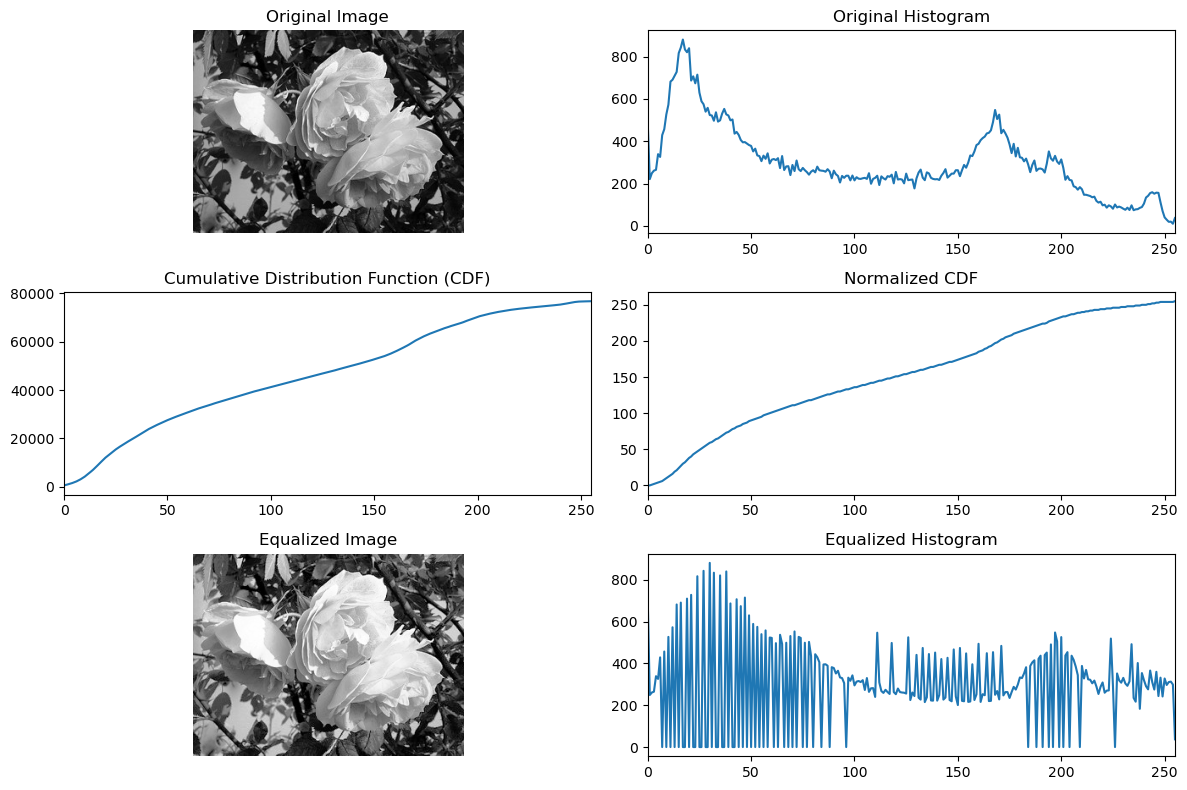


Original Pixel Values vs Equalized Pixel Values:

Original: 32, Equalized: 62
Original: 53, Equalized: 93
Original: 17, Equalized: 30
Original: 161, Equalized: 186
Original: 21, Equalized: 40
Original: 13, Equalized: 19
Original: 32, Equalized: 62
Original: 48, Equalized: 87
Original: 27, Equalized: 53
Original: 88, Equalized: 126
Original: 159, Equalized: 183
Original: 94, Equalized: 131
Original: 18, Equalized: 32
Original: 32, Equalized: 62
Original: 181, Equalized: 214
Original: 8, Equalized: 8
Original: 190, Equalized: 223
Original: 16, Equalized: 27
Original: 26, Equalized: 51
Original: 52, Equalized: 92
Original: 150, Equalized: 174
Original: 153, Equalized: 177
Original: 68, Equalized: 109
Original: 18, Equalized: 32
Original: 96, Equalized: 133
Original: 228, Equalized: 246
Original: 200, Equalized: 233
Original: 229, Equalized: 247
Original: 57, Equalized: 98
Original: 17, Equalized: 30
Original: 157, Equalized: 181
Original: 145, Equalized: 170
Original: 184, Equalized: 217

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')

# Load the original image in grayscale
image = cv2.imread(image_path, 0)

# Function to calculate the histogram
def calculate_histogram(image):
    hist = np.zeros(256)
    for pixel in image.ravel():
        hist[pixel] += 1
    return hist

# Step 1: Plot the Original Histogram
original_hist = calculate_histogram(image)

plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title("Original Histogram")
plt.plot(original_hist)
plt.xlim([0, 255])

# Step 2: Compute the Cumulative Distribution Function (CDF)
cdf = np.cumsum(original_hist)

# Print the CDF values
print("CDF (Cumulative Distribution Function):")
print(cdf)

plt.subplot(3, 2, 3)
plt.title("Cumulative Distribution Function (CDF)")
plt.plot(cdf)
plt.xlim([0, 255])

# Step 3: Normalize the CDF
cdf_min = cdf[np.nonzero(cdf)].min()  # Smallest non-zero value in CDF
cdf_max = cdf.max()  # Maximum CDF value
cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
cdf_normalized = cdf_normalized.astype(np.uint8)

# Print CDF min, max, and normalized CDF
print("\nCDF Minimum Value:", cdf_min)
print("CDF Maximum Value:", cdf_max)
print("\nNormalized CDF:")
print(cdf_normalized)

plt.subplot(3, 2, 4)
plt.title("Normalized CDF")
plt.plot(cdf_normalized)
plt.xlim([0, 255])

# Step 4: Map the Original Intensities to Equalized Values
equalized_image = cdf_normalized[image]

# Step 5: Generate Equalized Image and Histogram
equalized_hist = calculate_histogram(equalized_image)

plt.subplot(3, 2, 5)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title("Equalized Histogram")
plt.plot(equalized_hist)
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

# Print Original vs Equalized pixel values for comparison
print("\nOriginal Pixel Values vs Equalized Pixel Values:\n")
for i in range(0, image.shape[0], image.shape[0] // 10):  # To avoid printing too many values
    for j in range(0, image.shape[1], image.shape[1] // 10):  # Adjusting frequency to reduce output
        print(f"Original: {image[i, j]}, Equalized: {equalized_image[i, j]}")

